In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv1D,
    MaxPooling1D,
    LSTM,
    Bidirectional,
    Dropout,
    Flatten,
    Dense,
    Input,
)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session

from utils import load_dataset, train, plot_roc, auc
from einops import rearrange
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

[Reference](https://github.com/uci-cbcl/DanQ/blob/master/DanQ_train.py) 

In [5]:
clear_session()
model = Sequential(
    [
        Input((1000, 4)),
        Conv1D(128, kernel_size=26, activation="relu"),
        MaxPooling1D(pool_size=13, strides=13),
        Dropout(0.2),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.5),
        Flatten(),
        Dense(925, activation="relu"),
        Dense(1, activation="sigmoid"),
    ],
    name="danq_small",
)
model.summary()

Model: "danq_small"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 975, 128)          13440     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 75, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 75, 256)           263168    
_________________________________________________________________
dropout_1 (Dropout)          (None, 75, 256)           0         
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 925)               1

<IPython.core.display.Javascript object>

In [6]:
es = EarlyStopping(monitor="val_loss", patience=30)
optimizer = Adam(lr=1e-4)

epochs = 1000
validation_freq = 1
n = 2
file = f"MA0035_{n}000"

<IPython.core.display.Javascript object>

Epoch 1/1000
3125/3125 - 44s - loss: 0.6942 - acc: 0.5029 - val_loss: 0.6914 - val_acc: 0.5352
Epoch 2/1000
3125/3125 - 43s - loss: 0.6673 - acc: 0.5716 - val_loss: 0.4197 - val_acc: 0.8278
Epoch 3/1000
3125/3125 - 42s - loss: 0.2243 - acc: 0.9224 - val_loss: 0.1588 - val_acc: 0.9507
Epoch 4/1000
3125/3125 - 42s - loss: 0.1693 - acc: 0.9463 - val_loss: 0.1530 - val_acc: 0.9530
Epoch 5/1000
3125/3125 - 42s - loss: 0.1624 - acc: 0.9487 - val_loss: 0.1595 - val_acc: 0.9500
Epoch 6/1000
3125/3125 - 41s - loss: 0.1588 - acc: 0.9502 - val_loss: 0.1562 - val_acc: 0.9520
Epoch 7/1000
3125/3125 - 42s - loss: 0.1565 - acc: 0.9512 - val_loss: 0.1491 - val_acc: 0.9534
Epoch 8/1000
3125/3125 - 42s - loss: 0.1545 - acc: 0.9512 - val_loss: 0.1491 - val_acc: 0.9544
Epoch 9/1000
3125/3125 - 42s - loss: 0.1532 - acc: 0.9520 - val_loss: 0.1505 - val_acc: 0.9541
Epoch 10/1000
3125/3125 - 42s - loss: 0.1515 - acc: 0.9525 - val_loss: 0.1497 - val_acc: 0.9542
Epoch 11/1000
3125/3125 - 42s - loss: 0.1499 - ac

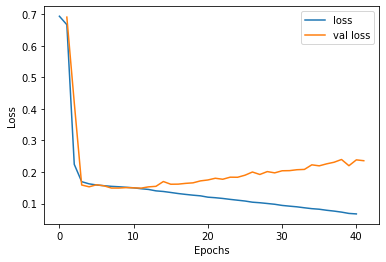

Training time: 28.69 minutes


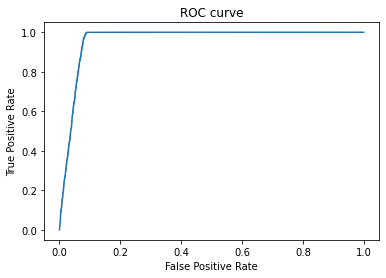

0.9621635799999999


<IPython.core.display.Javascript object>

In [7]:
X_train, y_train, X_test, y_test = load_dataset(file=file, labels="binlabels",)
X_train = rearrange(X_train, "w h c -> w c h")
X_test = rearrange(X_test, "w h c -> w c h")

model.compile(
    optimizer=optimizer, loss="binary_crossentropy", metrics=["acc"],
)

model = train(
    dataset=(X_train, y_train, X_test, y_test),
    model=model,
    epochs=epochs,
    verbose=2,
    validation_freq=validation_freq,
    callbacks=[es],
)

y_pred = model.predict(X_test)
plot_roc(y_test, y_pred)
print(auc(y_test, y_pred))

In [9]:
model.save(f"../model_saves/evals/{model.name}-{n}000.h5")

<IPython.core.display.Javascript object>

------------------MA0035_1000------------------


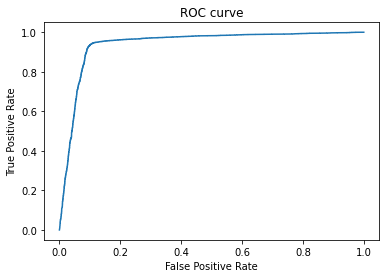

0.93929602
------------------MA0035_2000------------------


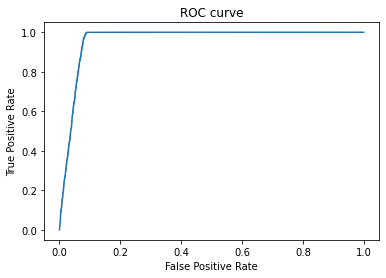

0.9621635799999999
------------------MA0035_3000------------------


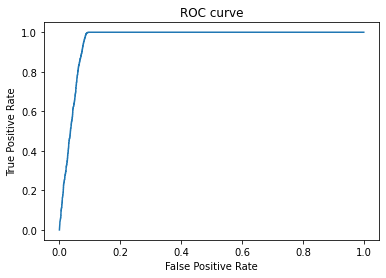

0.9620450799999999
------------------MA0035_5000------------------


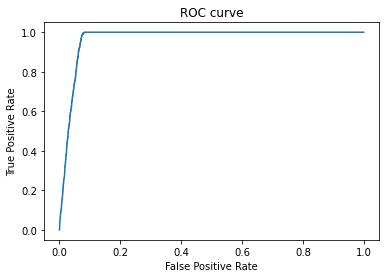

0.96753608
------------------MA0035_10000------------------


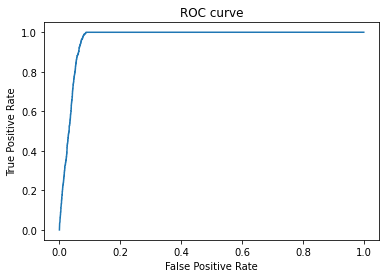

0.9678935599999999


<IPython.core.display.Javascript object>

In [8]:
for i in [1, 2, 3, 5, 10]:
    file = f"MA0035_{i}000"
    print(f"------------------{file}------------------")
    X_train, y_train, X_test, y_test = load_dataset(file=file, labels="binlabels",)
    X_train = rearrange(X_train, "w h c -> w c h")
    X_test = rearrange(X_test, "w h c -> w c h")
    y_pred = model.predict(X_test)
    plot_roc(y_test, y_pred)
    print(auc(y_test, y_pred))